This code initializes and trains an Actor-Critic (A2C) model using the Stable Baselines3 library. It performs the following steps:

1. Imports necessary modules and classes including `A2C`, `PPO`, `check_env`, `DataLoader`, and `CustomBuySellEnv`.
2. Loads the data using the `DataLoader` class.
3. Initializes the custom environment `CustomBuySellEnv` with the loaded data.
4. Checks the environment for compatibility using `check_env`.
5. Initializes the A2C model with the custom environment.
6. Trains the A2C model for a total of 10,000 timesteps.

In [ ]:
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.env_checker import check_env
from utils.DataLoader import DataLoader
from envs.CustomBuySellEnv import CustomBuySellEnv

data = DataLoader()
env = CustomBuySellEnv(data)
check_env(env)

model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

[*********************100%***********************]  1 of 1 completed
/home/tommy/ai-playground/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:37: UserWarning: Discrete action space  with a non-zero start (start=-1) is not supported by Stable-Baselines3. You can use a wrapper or update your action space.
  warnings.warn(


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------------
| rollout/              |             |
|    ep_len_mean        | 364         |
|    ep_rew_mean        | -375        |
| time/                 |             |
|    fps                | 64          |
|    iterations         | 100         |
|    time_elapsed       | 7           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -1.07       |
|    explained_variance | 0.066603124 |
|    learning_rate      | 0.0007      |
|    n_updates          | 99          |
|    policy_loss        | -27.5       |
|    value_loss         | 1.07e+03    |
---------------------------------------
---------------------------------------
| rollout/              |             |
|    ep_len_mean        | 364         |
|    ep_rew_mean        | -417        |
| time/                 |             |
|    fps                | 

[*********************100%***********************]  1 of 1 completed


/home/tommy/ai-playground/.venv/lib/python3.12/site-packages/stable_baselines3/common/env_checker.py:37: UserWarning: Discrete action space  with a non-zero start (start=-1) is not supported by Stable-Baselines3. You can use a wrapper or update your action space.
  warnings.warn(


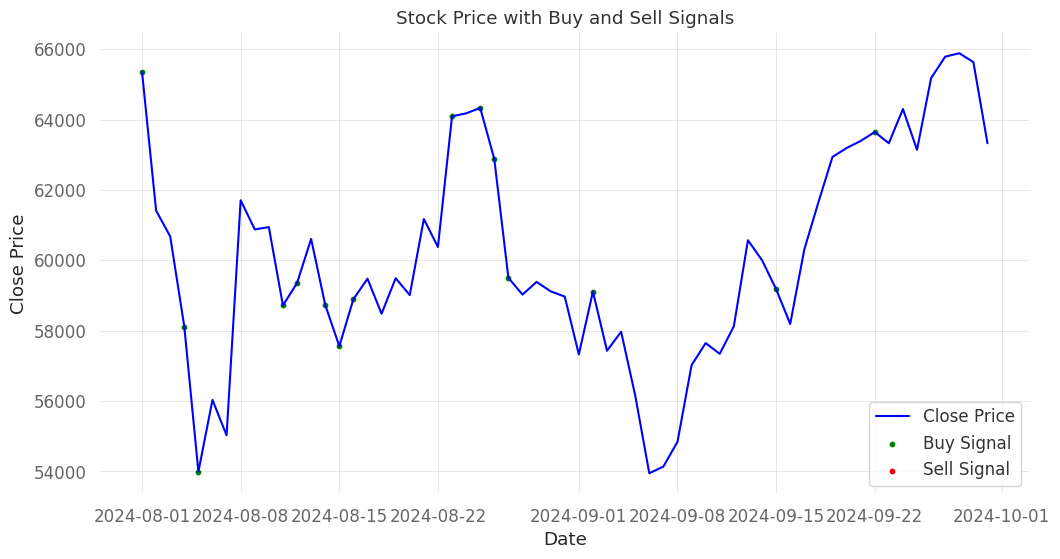

                    Strategy
------------------  ----------
Start Period        2024-08-01
End Period          2024-09-29
Risk-Free Rate      0.0%
Time in Market      99.0%

Cumulative Return   7.81%
CAGR﹪              37.88%

Sharpe              1.45
Prob. Sharpe Ratio  76.04%
Sortino             2.32
Sortino/√2          1.64
Omega               1.27

Max Drawdown        -11.78%
Longest DD Days     29

Gain/Pain Ratio     0.27
Gain/Pain (1M)      13.93

Payoff Ratio        1.15
Profit Factor       1.27
Common Sense Ratio  1.74
CPC Index           0.77
Tail Ratio          1.37
Outlier Win Ratio   2.77
Outlier Loss Ratio  3.04

MTD                 8.75%
3M                  7.81%
6M                  7.81%
YTD                 7.81%
1Y                  7.81%
3Y (ann.)           37.88%
5Y (ann.)           37.88%
10Y (ann.)          37.88%
All-time (ann.)     37.88%

Avg. Drawdown       -3.17%
Avg. Drawdown Days  8
Recovery Factor     0.69
Ulcer Index         0.05
Serenity Index      0.31


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


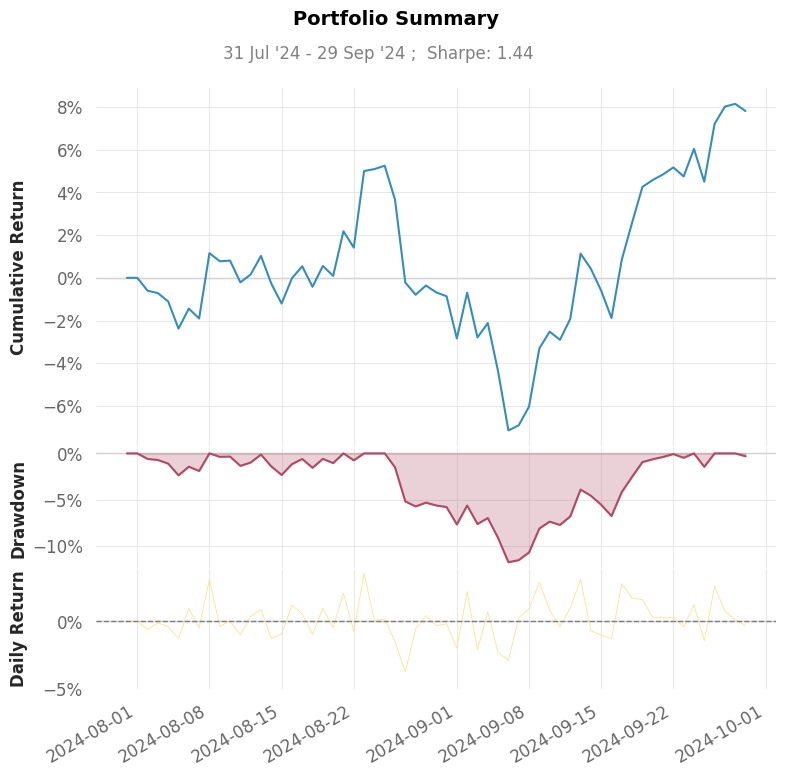

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


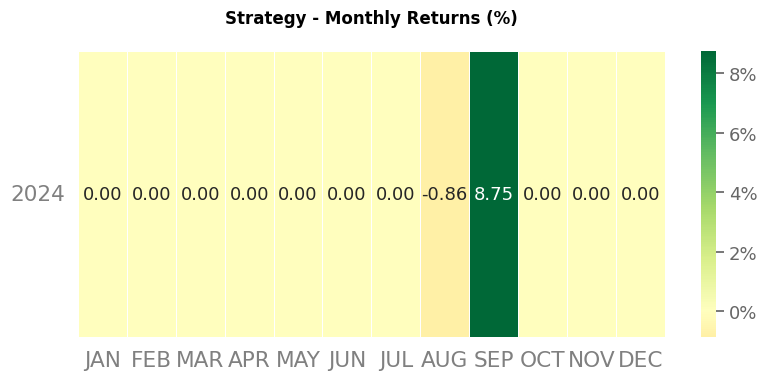

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import quantstats as qs

test_data = DataLoader('BTC-USD', '2024-08-01', '2024-10-01')

test_env = CustomBuySellEnv(test_data)
check_env(test_env)

portfolio_values = []
observation, info = test_env.reset()

while True:
    action, _states = model.predict(observation)

    observation, reward, terminated, truncated, info = test_env.step(action)
    done = terminated or truncated
    portfolio_values.append(info['portfolio_value'])

    if done:
        break

actions_data = test_env.close()
actions_data.index = pd.to_datetime(test_data.frame.index)
buy_signals = actions_data[actions_data['Action'] == 1]
sell_signals = actions_data[actions_data['Action'] == -1]

# Plot the closing prices
plt.figure(figsize=(12, 6))
plt.plot(actions_data.index, test_data.frame['Close'], label='Close Price', color='blue', linewidth=1.5)

# Plot buy signals (green dots)
plt.scatter(buy_signals.index, test_data.frame.loc[buy_signals.index, 'Close'], color='green', label='Buy Signal', marker='o', s=10)

# Plot sell signals (red dots)
plt.scatter(sell_signals.index, test_data.frame.loc[sell_signals.index, 'Close'], color='red', label='Sell Signal', marker='o', s=10)

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Stock Price with Buy and Sell Signals')
plt.legend()
plt.grid(True)
plt.show()

dates = pd.date_range(start=test_data.frame.index[0], periods=len(portfolio_values), freq="D")
portfolio_series = pd.Series(portfolio_values, index=dates)

returns = portfolio_series.pct_change().fillna(0)

qs.reports.basic(returns)